# R for Descriptive and Elementary Data Analysis and Probability Functions


In [38]:
#install.packages("gtools")
library(gtools)
install.packages("moments")
library(moments)


The downloaded binary packages are in
	/var/folders/gf/qps22c6s1c74vmxch_hrw20r0000gn/T//RtmpRg2Tr2/downloaded_packages


## Random Variables (R.V.)
* A random variable, usually written X, is a variable whose possible values are numerical outcomes of a random phenomenon.
* A random variable is always denoted with an upper case
* An observed variable is denoted with a lower case
### There are two types of random variables:

* **Discrete random variable**: Takes on a finite (or countably infinite) number of values.
* **Continuous random variable**: Takes on an interval of values (uncountably infinite values)




## Discrete
### Distribution of Discrete RV
* The distribution of a discrete random variable is described by a collection of possible distinct outcomes and their associated probabilities. 
### Probability Mass Function (PMF)

Denoted by $f_x(x)=P(X=x) $ for all values of x

A function $f_x$ can only be a PMF if it satisfies:
1. $f_x \geq 0$ for all x
2. $\sum_x f_x(x)=\sum_x P(X=x)=1$

Remember probabilities can only be between 0 and 1!

### Cumulative Distribution Function (CDF)

The cumulative distribution function $F_x(x)$ gives the probability that the variable takes a value less than or equal to x and is defined for all real x . It must satisfy $0\leq F_x(x) \leq 1$ for all x.
$$ F_x(x)=P(X \leq x)=\sum_{x_j \leq x} f(x_j) $$


## Example 1: Binomial Distribution

A binomial random variable counts how often a particular event occurs in a fixed number of tries or trials. For a variable to be a binomial random variable, ALL of the following conditions must be met:

* There are a fixed number of trials (a fixed sample size).
* On each trial, the event of interest either occurs (success) or does not (failure).
* The probability of occurrence (or not) is the same on each trial.
* Trials are independent of one another.

Example: Number of left-handers in a randomly selected sample of 50 unrelated people

You need:
* n=number of trials (sample size)
* p= probability event occurs on any one trial

$$P(X=x)={{n}\choose{x}} p^x (1-p)^{n-x}$$
for $x=0, 1, 2,..., n$ where $ {{n}\choose{x}}=\frac{n!}{x!(n-x)!}$

In [2]:
#Generate N=15 independent binomial random variables with n=5 trials and probability p=.6
rbinom(15, 5,.6 ) ## this means that out of 5 trials we either get a success or we do not

[1] 4 3 3 3 3 3 4 2 2 4 2 4 2 3 2

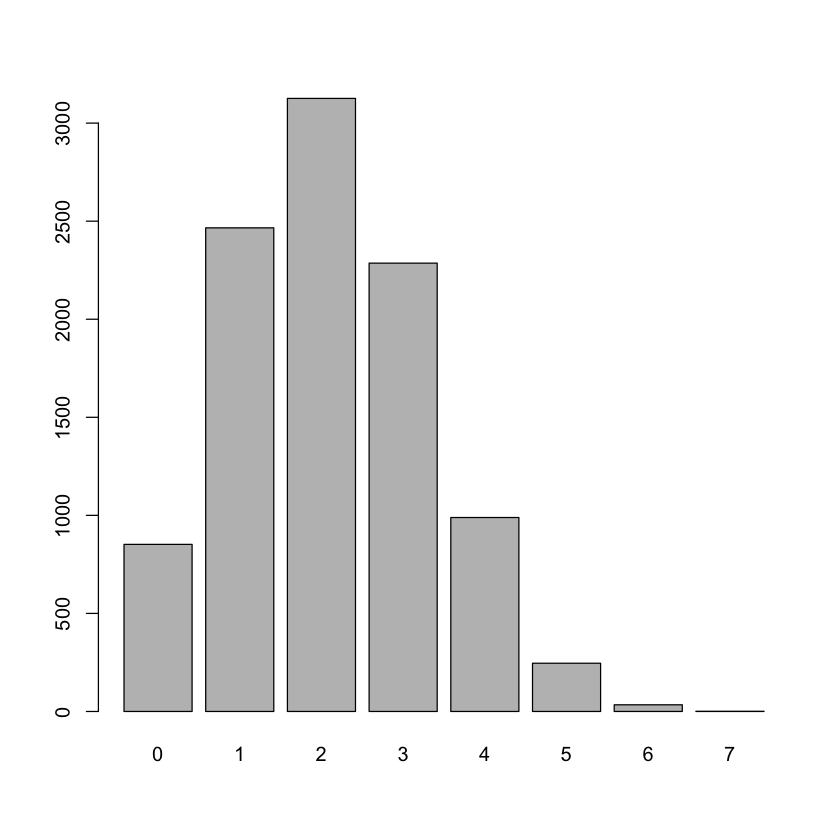

In [3]:
# Probability distribution
#Generate a sample of N=10,000 with n=7 trials and a probability of success p=.3
X=rbinom(10000,7, .3)

#X
# Barplot of the probability distribution ##Why barplot and not a histogram??
#If I sample 10,000 numbers from Bin(n=7, p=.3), what does the distribution look like?
barplot(table(X))


In [4]:
##distribution: this gives you the probability of x=0,1,2,3,4,5,6,7
dbinom(0:7, 7, .3)
#note: these outputs are between 0 and 1 and are probabilities! ie) a single point/outcome has probability

[1] 0.0823543 0.2470629 0.3176523 0.2268945 0.0972405 0.0250047 0.0035721
[8] 0.0002187

In [5]:
#check our assumption that the probabilities sum to 1!
sum(dbinom(0:7, 7, .3))


[1] 1

In [6]:
#Example: What is the probability of exactly 2 successes (P(X=2)) for a binomial distribution Bin(n=7, p=.3)? 
dbinom(2,7,.3) #calculate using R
choose(7,2)*(.3^2)*(.7^5) #calculate by hand

[1] 0.3176523

[1] 0.3176523

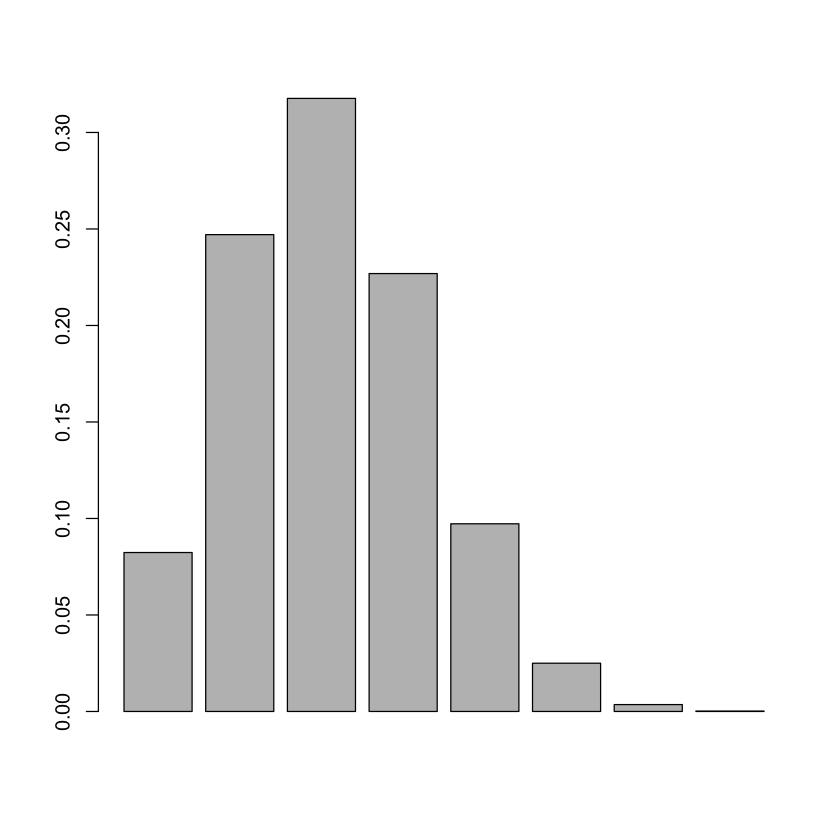

In [7]:
#Distribution using the formula, plotting the P(X=x)
barplot(dbinom(0:7, 7, .3))

#### Population Mean of Binomial Distribution: $E(x)=n*p$
#### Population Variance of Binomial Distribution: $Var(x)=n*p(1-p)$
#### Population Standard deviation of Binomial Distribution: $sd(x)=\sqrt{ n*p(1-p)}$

In [8]:
#sample mean
mean(X) 
7*.3
#sample variance
var(X)
7*.3*(1-.3)
#sample standard deviation
sd(X)
sqrt(7*.3*(1-.3))

[1] 2.0973

[1] 2.1

[1] 1.480581

[1] 1.47

[1] 1.216791

[1] 1.212436

#### With a large sample our expected mean and variance for the population are close to our sample mean and variance!

#### What happens when we have a smaller sample?


In [10]:
#Sample of 10
X_10=rbinom(10,7, .3)
#sample mean
mean(X_10)
7*.3
#sample variance
var(X_10)
7*.3*(1-.3)
#sample standard deviation
sd(X_10)
sqrt(7*.3*(1-.3))

[1] 1.4

[1] 2.1

[1] 2.044444

[1] 1.47

[1] 1.429841

[1] 1.212436

In [11]:
#Sample of 100
X_100=rbinom(10,7, .3)
#sample mean
mean(X_100)
7*.3
#sample variance
var(X_100)
7*.3*(1-.3)
#sample standard deviation
sd(X_100)
sqrt(7*.3*(1-.3))

[1] 2.1

[1] 2.1

[1] 0.9888889

[1] 1.47

[1] 0.9944289

[1] 1.212436

## Continuous 
### Distribution of Continuous RV
* The distribution of a continuous random variable is described by its probability density function (PDF). You can find the probability between two constants by adding up the area under the density curve. 

* Note: Unlike discrete random variables where we can determine $P(X=x)$ for all possible values of x and get a probability for a point, the probability that X takes on any particular value x is 0 for continuous random variables. AKA. We can't find $P(X=x)$!

* Instead, we find the probability that $X$ falls into some interval $(a,b)$ ie. $P(a<X<b)$.  We can use the PDF to do this!

### Probability Density Function (PDF) and Cumulative Distribution Function (CDF)
* PDF is denoted by $f_X(x)$
* CDF is denoted by $F_X(x)$

$F_X(x)=\int_{-\infty}^{x} f(u)\ du$ for all x
$f_X(x)=\frac{d}{dx} F_X(x)$

* We can find the probability $P(a<X<b)=\int_{a}^{b} f_x(X)\ dx$

A function $f_x$ can only be a PDF if it satisfies:
1. $f_X(x) \geq 0$ for all x
2. $\int_{-\infty}^{\infty} f_x(x)=1$

Outputs of $f_X(x)$ are NOT probabilities!

### Describing A Distribution:
* E(x)=Expected Value ($\mu$)= mean of a random variable X (FIRST CENTRAL MOMENT)
* Var(x)= Variance ($\sigma^2$)= variance of random variable x (SECOND CENTRAL MOMENT)
* Skewness=measure of lack of symmetry (THIRD CENTRAL MOMENT)
* Kirtosis=measure of whether data are heavy-tailed or light-tailed relative to the normal distribution  (FOURTH CENTRAL MOMENT)
* Median=midpoint


## Example 2: Normal Distribution

$$f_X(x)=\frac{1}{{\sigma \sqrt{2\pi } }}  e^{\frac{ - ( x - \mu )^2} {2\sigma^2}} $$

where $-\infty<x<\infty$.

Mean=$\mu$ and $\mu\in\mathbb{R}$ 

Variance=$\sigma^2$ and $\sigma^2>0$ 

* Standard normal distribution has $\mu=0$ and $\sigma=1$

In [32]:
#Generate N=15 independent normal random variables with mean=20 and sd=8 
N_15=rnorm(15, mean=20,sd=8 ) 
N_15

[1] 10.960566 29.997831 19.029017 18.672128 17.911622  8.396361  5.362141
 [8] 20.351925 21.143897 14.824477  4.734556 22.648933 26.456188 24.315414
[15] 22.438857

In [33]:
#What is the mean of our sample?
mean(N_15) #Is this close to E(x)=20?


[1] 17.81626

In [34]:
#What is the variance of our sample?
var(N_15) #Is this close to var(x)=64
sd(N_15) 

[1] 57.18844

[1] 7.562304

In [40]:
#What is the skewness and kurtosis of our sample?
skewness(N_15) #skewness of normal distribution is 0!
#negative indicates skewed left, positive indicates skewed right
kurtosis(N_15) #kurtosis of normal distribution should be near 3

[1] -0.4036237

[1] 2.200817

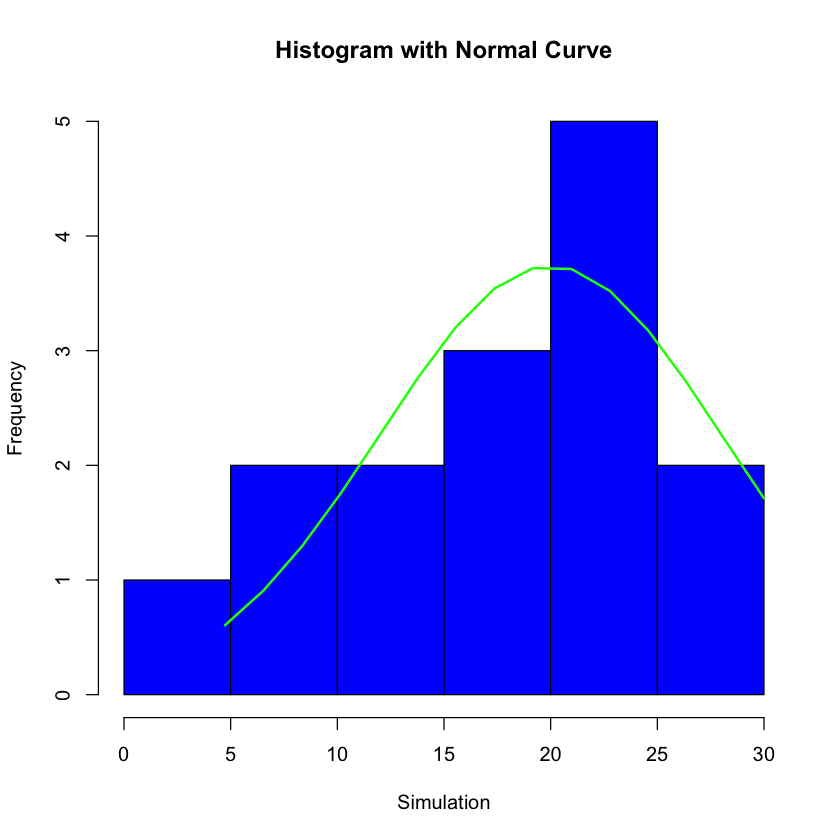

In [35]:
#plot a histogram of the distribution of our sample
h<-hist(N_15, breaks=5, col="blue", xlab="Simulation", 
  	main="Histogram with Normal Curve") 
xfit<-seq(min(N_15),max(N_15),length=15) 
yfit<-dnorm(xfit,mean=20,sd=8) 
yfit <- yfit*diff(h$mids[1:2])*length(N_15) 
lines(xfit, yfit, col="green", lwd=2) #normal curve



In [26]:
#Now generate N=10000 independent normal random variables with mean=20 and sd=8
N_big=rnorm(10000, mean=20, sd=8)


In [27]:
#What is the mean of our sample?
mean(N_big) #Is this close to E(x)=20?

### THis is called the law of large numbers!  
#The average of the results obtained from a large number of 
#trials should be close to the expected value

[1] 19.91042

In [28]:
#What is the variance of our sample?
var(N_big) #Is this close to var(x)=64?
sd(N_big) #Is this close to sd(x)=8?

[1] 64.78432

[1] 8.048871

In [39]:
#What is the skewness and kurtosis of our sample?
skewness(N_big) #skewness of normal distribution is 0!
#negative indicates skewed left, positive indicates skewed right
kurtosis(N_big) #kurtosis of normal distribution is near 3

[1] -0.008094459

[1] 2.955426

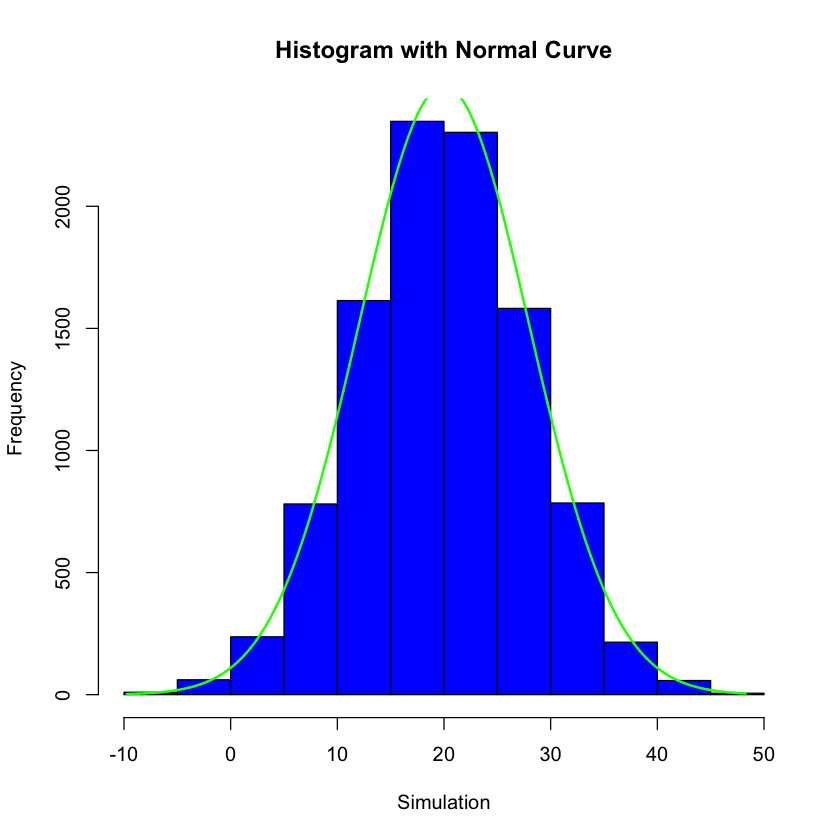

In [36]:
#plot a histogram of the distribution of our sample
h_big<-hist(N_big, breaks=10, col="blue", xlab="Simulation", 
  	main="Histogram with Normal Curve") 
xfit<-seq(min(N_big),max(N_big),length=10000) 
yfit<-dnorm(xfit,mean=20,sd=8) 
yfit <- yfit*diff(h$mids[1:2])*length(N_big) 
lines(xfit, yfit, col="green", lwd=2) #normal curve

### Central Limit Theorem
The sum of n independent and identically distributed random variables is approximately  normally distributed when n is sufficiently large. 
* This means that the sampling distribution of any statistic will be approximately normal if the sample size is large enough!

The central limit theorem is of fundamental importance, because it means that we can approximate the distribution of certain statistics, even if we know very little about the underlying sampling distribution.
* Common practice:
    * For testing means, we can use the CLT if $n\geq 30$.

Note: CLT only applies to **shape**, not mean or standard deviation—we can find a mean and standard deviation for any distribution (like binomial)

* When do we use CLT? If sampling distribution is not normal AND $n>30$.  Don’t need it if the sampling distribution is normal and should use the distribution of $f(x)$ if $n<30$. 


In [43]:
#### Having fun with ggplot2
install.packages("ggplot2")
library(ggplot2)



The downloaded binary packages are in
	/var/folders/gf/qps22c6s1c74vmxch_hrw20r0000gn/T//RtmpRg2Tr2/downloaded_packages


### About the Dataset Infection Risk
* InfctRsk = infection risk in hospital
* Stay = average length of patient’s stay (in days)
* Region = indication in which of 4 U.S. regions the hospital is located (north-east, north- central, south, west)




In [62]:
###set your working directory##
#setwd("/Users/sarahmullin/Desktop/BMI 504/")
###make sure datafiles are in the folder that you set your working directory to.
######hospital infection risk data
risk=read.table("infectionrisk.txt", sep="",header=T)
risk[1:10,]
risk$MedSchool_factor=as.factor(risk$MedSchool)
risk$Region_factor=as.factor(risk$Region)

ID,Stay,Age,InfctRsk,Culture,Xray,Beds,MedSchool,Region,Census,Nurses,Facilities
1,7.13,55.7,4.1,9.0,39.6,279,2,4,207,241,60
2,8.82,58.2,1.6,3.8,51.7,80,2,2,51,52,40
3,8.34,56.9,2.7,8.1,74.0,107,2,3,82,54,20
4,8.95,53.7,5.6,18.9,122.8,147,2,4,53,148,40
5,11.20,56.5,5.7,34.5,88.9,180,2,1,134,151,40
6,9.76,50.9,5.1,21.9,97.0,150,2,2,147,106,40
7,9.68,57.8,4.6,16.7,79.0,186,2,3,151,129,40
8,11.18,45.7,5.4,60.5,85.8,640,1,2,399,360,60
9,8.67,48.2,4.3,24.4,90.8,182,2,3,130,118,40
10,8.84,56.3,6.3,29.6,82.6,85,2,1,59,66,40


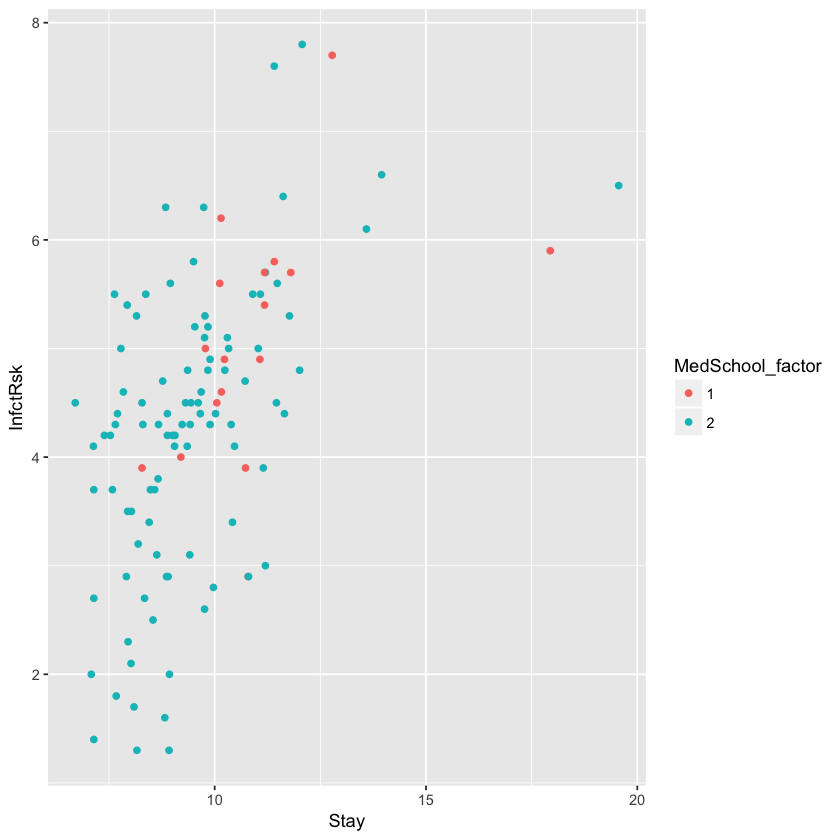

In [60]:
####some fun plots Stay and Risk scatterplot by Med School
ggplot(subset(risk, MedSchool_factor %in% c("1", "2")),
       aes(x=Stay,
           y=InfctRsk,
           color=MedSchool_factor))+
  geom_point()

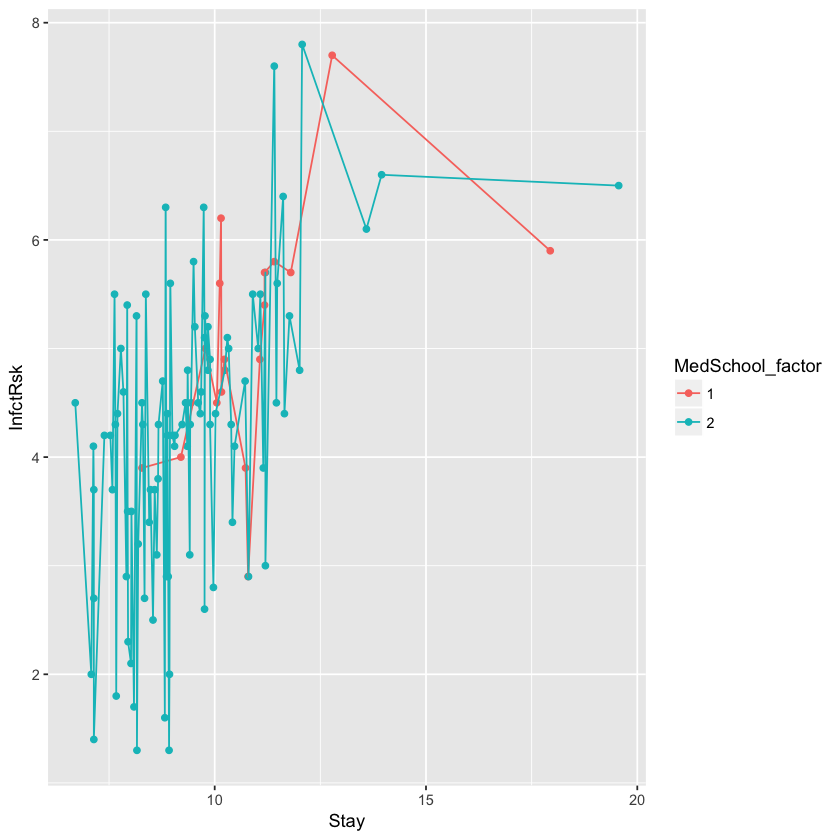

In [59]:
####some fun plots
ggplot(subset(risk, MedSchool_factor %in% c("1", "2")),
       aes(x=Stay,
           y=InfctRsk,
           color=MedSchool_factor))+
  geom_point()+geom_line()

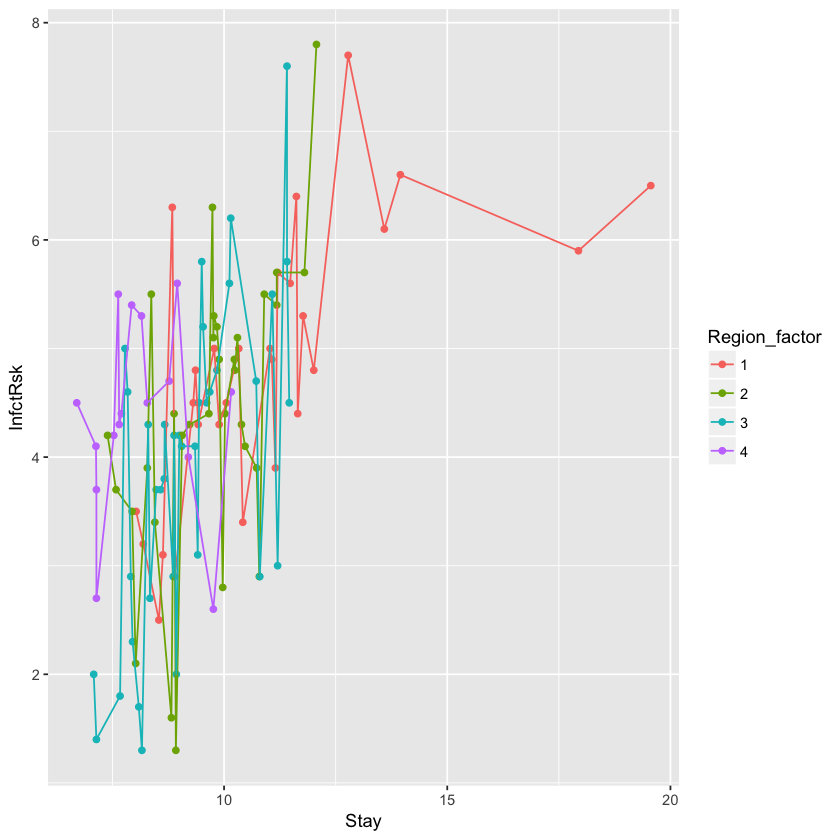

In [63]:
####some fun plots
ggplot(subset(risk, Region_factor %in% c("1", "2", "3","4")),
       aes(x=Stay,
           y=InfctRsk,
           color=Region_factor))+
  geom_point()+geom_line()

In [64]:
#### Make a boxplot Infectious Risk
min(risk$InfctRsk)
median(risk$InfctRsk)
IQR(risk$InfctRsk)
max(risk$InfctRsk)

[1] 1.3

[1] 4.4

[1] 1.5

[1] 7.8

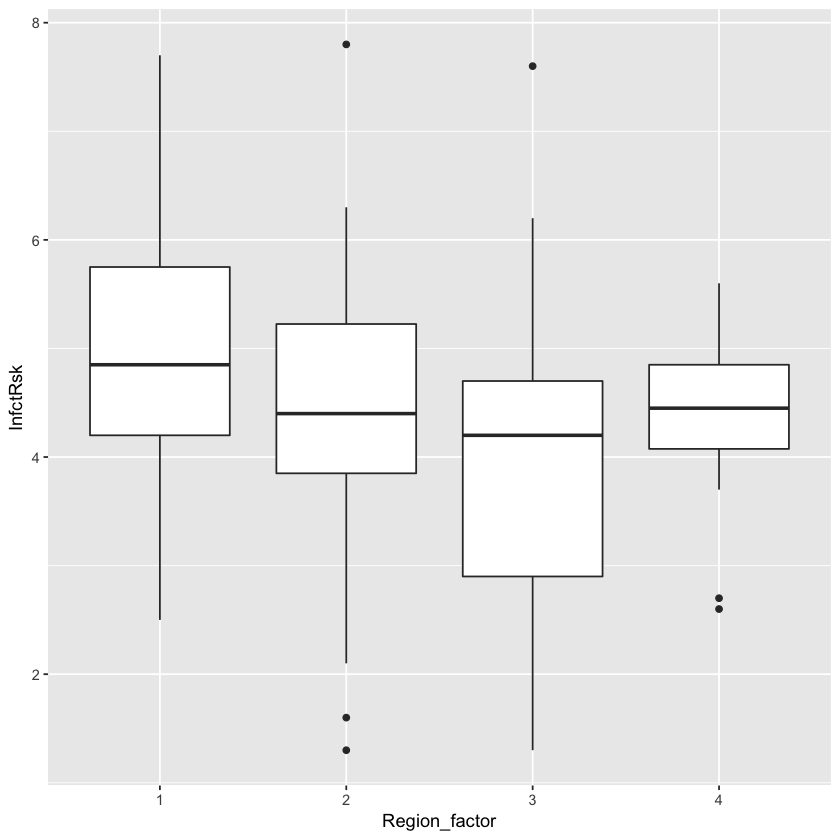

In [69]:
###plot boxplot for Infectious Risk by Region
p10 <- ggplot(risk, aes(x = Region_factor, y = InfctRsk)) +
        geom_boxplot()
p10

[ggplot2 tutorial](http://tutorials.iq.harvard.edu/R/Rgraphics/Rgraphics.html)